# Rotation matrix
$$
\begin{eqnarray*}
P & := & \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix} \\
& = & \begin{bmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22} \\
\end{bmatrix} \\
\end{eqnarray*}
$$

* https://en.wikipedia.org/wiki/Rotation_matrix

* column vector $p_j := \begin{bmatrix}
p_{1j} \\
p_{2j}
\end{bmatrix}$
* row vector $q_i := [p_{i1} \quad p_{i2}]$

# Projection of $[x \quad y]$ onto $q_i$ 
$$
proj_{q_i} (x,y) := (q_i \cdot [x \quad y]) q_i 
$$

* https://en.wikipedia.org/wiki/Vector_projection

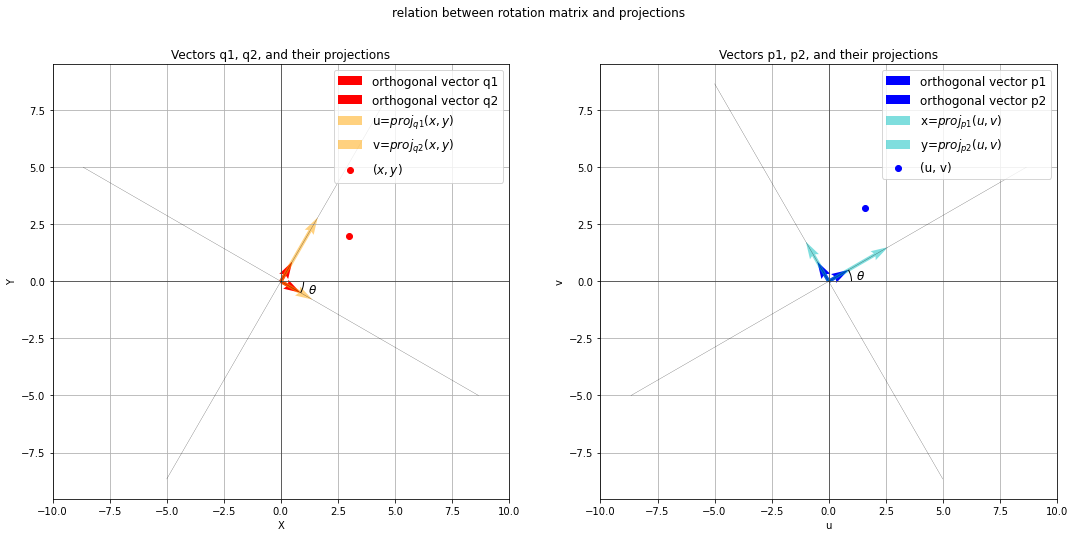

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def rotation_matrix(angle):
    '''
    angle: [radian]
    '''
    # Generate the 2D rotation matrix
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    return rotation_matrix

# Define the rotation angle (e.g., pi/6 radians)
angle = np.pi / 6
R = rotation_matrix(angle)

# column vectors of the rotation matrix
p1 = R[:, 0]  # First column
p2 = R[:, 1]  # Second column

# row vectors of the rotation matrix
q1 = R[0]
q2 = R[1]

# rotate this point
x, y = 3, 2
point = np.array([x, y])

# rotate (x y) using rotation matrix
new_point = R @ point 
u, v = new_point

# Compute projection of (x, y) onto q1, q2
projq1 = (point.T @ q1) * q1
projq2 = (point.T @ q2) * q2

# Compute projection of (u, v) onto p1, p2
projp1 = (new_point @ p1) * p1
projp2 = (new_point @ p2) * p2

# Create subplots 
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Subplot 1: Vectors q1, q2, and projections
axs[0].quiver(0, 0, q1[0], q1[1], angles='xy', scale_units='xy', scale=1, color='r', label='orthogonal vector q1')
axs[0].quiver(0, 0, q2[0], q2[1], angles='xy', scale_units='xy', scale=1, color='r', label='orthogonal vector q2')
axs[0].quiver(0, 0, projq1[0], projq1[1], angles='xy', scale_units='xy', scale=1, color='orange', label='u=$proj_{q1} (x,y)$', alpha=0.5)
axs[0].quiver(0, 0, projq2[0], projq2[1], angles='xy', scale_units='xy', scale=1, color='orange', label='v=$proj_{q2} (x, y)$', alpha=0.5)
axs[0].scatter(point[0], point[1], label='$(x, y)$', color='r')
axs[0].plot([-10*q1[0], 10*q1[0]], [-10*q1[1], 10*q1[1]], linewidth=0.2, color='k')
axs[0].plot([-10*q2[0], 10*q2[0]], [-10*q2[1], 10*q2[1]], linewidth=0.2, color='k')
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 5)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Vectors q1, q2, and their projections')

# Subplot 2: Vectors p1, p2, and projections
axs[1].quiver(0, 0, p1[0], p1[1], angles='xy', scale_units='xy', scale=1, color='b', label='orthogonal vector p1')
axs[1].quiver(0, 0, p2[0], p2[1], angles='xy', scale_units='xy', scale=1, color='b', label='orthogonal vector p2')
axs[1].quiver(0, 0, projp1[0], projp1[1], angles='xy', scale_units='xy', scale=1, color='c', label='x=$proj_{p1} (u,v)$', alpha=0.5)
axs[1].quiver(0, 0, projp2[0], projp2[1], angles='xy', scale_units='xy', scale=1, color='c', label='y=$proj_{p2} (u, v)$', alpha=0.5)
axs[1].scatter(new_point[0], new_point[1], label='(u, v)', color='b')
axs[1].plot([-10*p1[0], 10*p1[0]], [-10*p1[1], 10*p1[1]], linewidth=0.2, color='k')
axs[1].plot([-10*p2[0], 10*p2[0]], [-10*p2[1], 10*p2[1]], linewidth=0.2, color='k')
axs[1].set_xlim(-3, 3)
axs[1].set_ylim(-3, 5)
axs[1].set_xlabel('u')
axs[1].set_ylabel('v')
axs[1].set_title('Vectors p1, p2, and their projections')

# Add annotation for the angle
center = (0.0, 0.0)
radius = 1.0
start_angle = 0
stop_angle = 30
arc = patches.Arc(center, 2 * radius, 2 * radius, angle=0.0, theta1=start_angle, theta2=stop_angle, fill=False)
axs[1].add_patch(arc)

# Add annotation for the angle
center = (0.0, 0.0)
radius = 1.0
start_angle = -30
stop_angle = 0
arc = patches.Arc(center, 2 * radius, 2 * radius, angle=0.0, theta1=start_angle, theta2=stop_angle, fill=False)
axs[0].add_patch(arc)

# Add text at the center of the arc
axs[1].annotate(r'$\theta$', xy=(0.7, 0.6), xytext=(1.2, 0.1), fontsize=12)  # You can adjust the fontsize as needed

# Add text at the center of the arc
axs[0].annotate(r'$\theta$', xy=(0.7, 0.6), xytext=(1.2, -0.5), fontsize=12)  # You can adjust the fontsize as needed

# Set common title
plt.suptitle('relation between rotation matrix and projections')

# common setting
for ax in axs:
    ax.legend(fontsize=12) 
    ax.axis('equal')
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

plt.show()


# $\theta$